In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


#### Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. 

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

The Iris Dataset helps predict the Iris flower species based on a few given properties. It consists of 5 features and one target variable. 

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Clean the species name
df['species'] = df.species.str.replace('Iris-' , '')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

<AxesSubplot:>

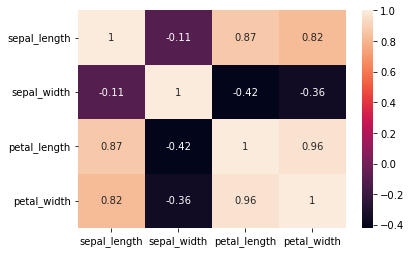

In [6]:
#finding correlation of features 
correl=df.corr()
sns.heatmap(correl,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

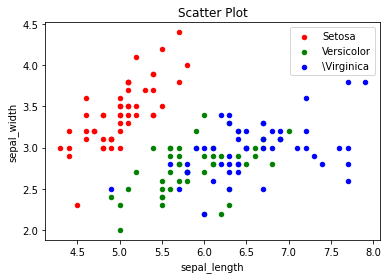

In [7]:
ax = df[df.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='Setosa')
df[df.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='Versicolor', ax=ax)
df[df.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='\Virginica', ax=ax)
ax.set_title("Scatter Plot")

In [8]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])


In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Visualize the data

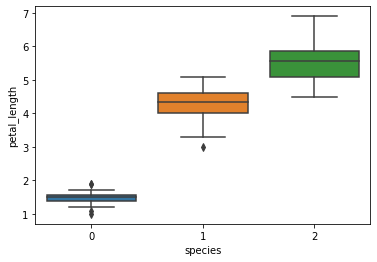

In [10]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


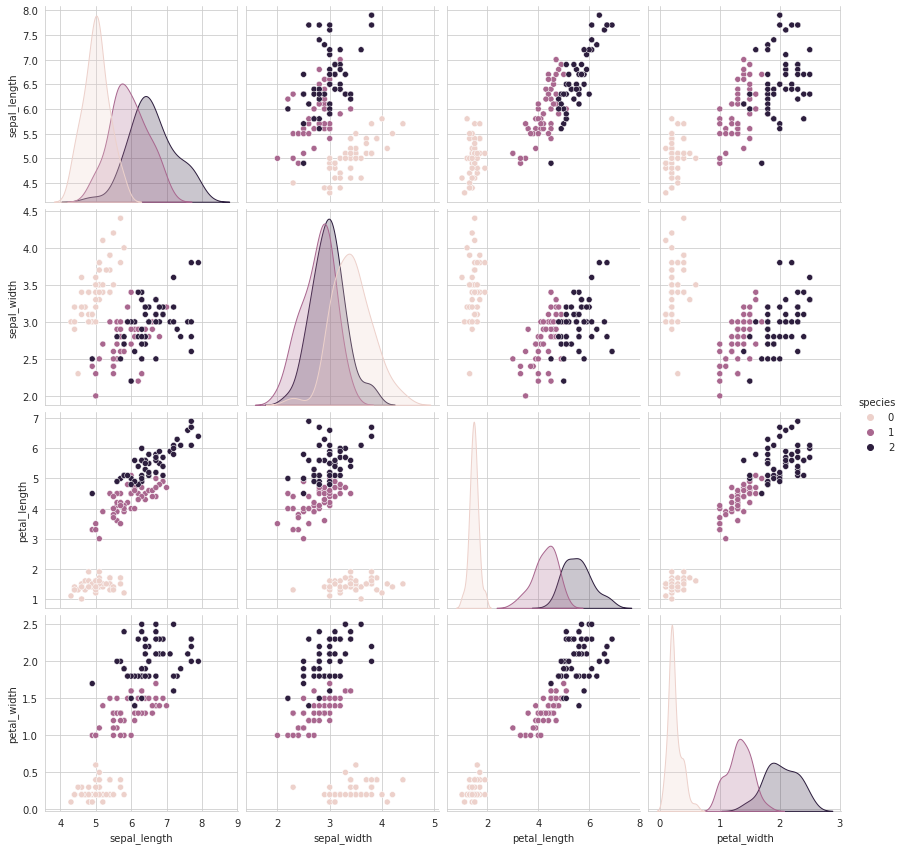

In [11]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

In [12]:
# Load columns needed for clustering - remove  the species column
x = df.iloc[:, [0,1,2,3]]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


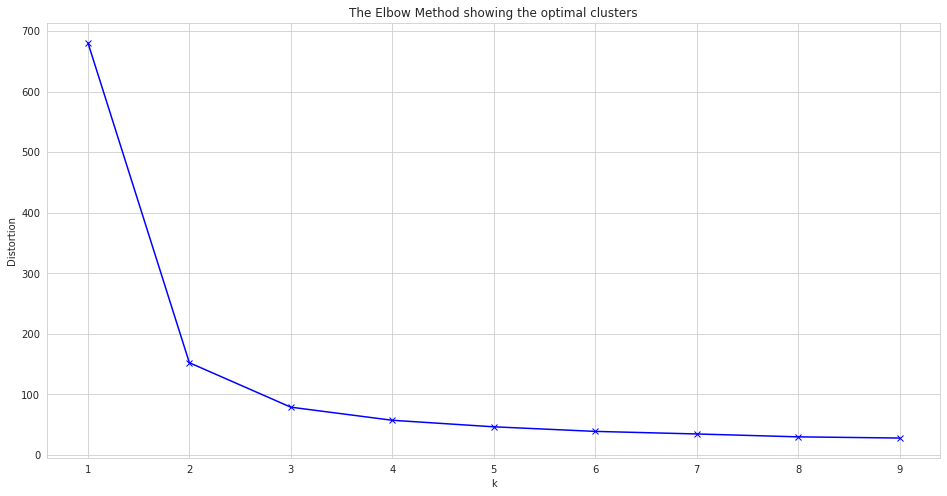

In [13]:
# Elbow method to find optimal no of clusters
# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [14]:
# The optimal number of clusters is 3 based on above chart's elbow

In [15]:
#converting dataframe to np array 
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [16]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)


In [17]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)


99.10714285714286
94.73684210526315


In [18]:
#classification report for training set 
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.98      1.00      0.99        50
         2.0       1.00      0.92      0.96        12

    accuracy                           0.99       112
   macro avg       0.99      0.97      0.98       112
weighted avg       0.99      0.99      0.99       112

